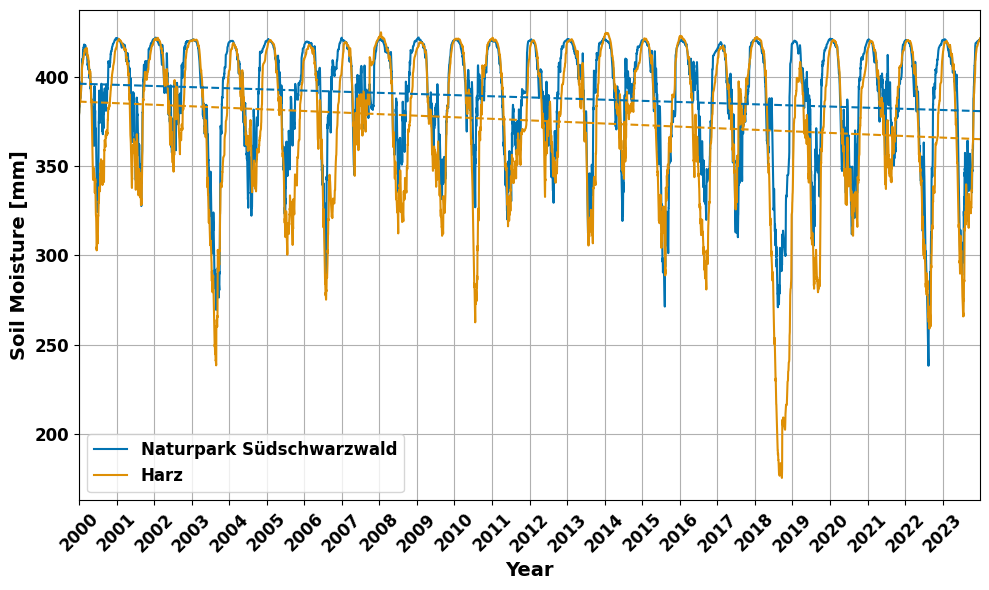

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns
import numpy as np

# Read the NetCDF files into xarray.DataArray objects
soil_moisture_xr_schwarzwald = xr.open_dataarray('data/soil_moisture_data_schwarzwald.nc')
soil_moisture_xr_harz = xr.open_dataarray('data/soil_moisture_data_harz.nc')

# Calculate the mean along the lat and lon axes (axis=1) for soil moisture for both regions
mean_soil_moisture_schwarzwald = soil_moisture_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_soil_moisture_harz = soil_moisture_xr_harz.mean(dim=('lat', 'lon'))

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the mean soil moisture for Schwarzwald
plt.figure(figsize=(10, 6))
schwarzwald_color = sns.color_palette()[0]  # First color in the colorblind palette
harz_color = sns.color_palette()[1]  # Second color in the colorblind palette
plt.plot(mean_soil_moisture_schwarzwald.time, mean_soil_moisture_schwarzwald, linestyle='-', color=schwarzwald_color, label='Naturpark Südschwarzwald')
# Plot the mean soil moisture for Harz
plt.plot(mean_soil_moisture_harz.time, mean_soil_moisture_harz, linestyle='-', color=harz_color, label='Harz')

# Calculate trend lines
z_schwarzwald = np.polyfit(mdates.date2num(mean_soil_moisture_schwarzwald.time), mean_soil_moisture_schwarzwald, 1)
p_schwarzwald = np.poly1d(z_schwarzwald)
plt.plot(mean_soil_moisture_schwarzwald.time, p_schwarzwald(mdates.date2num(mean_soil_moisture_schwarzwald.time)), color=schwarzwald_color, linestyle='--')

z_harz = np.polyfit(mdates.date2num(mean_soil_moisture_harz.time), mean_soil_moisture_harz, 1)
p_harz = np.poly1d(z_harz)
plt.plot(mean_soil_moisture_harz.time, p_harz(mdates.date2num(mean_soil_moisture_harz.time)), color=harz_color, linestyle='--')

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Soil Moisture [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_soil_moisture_schwarzwald.time.min(), mean_soil_moisture_schwarzwald.time.max())

# Show every year on the x-axis based on the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.tight_layout()

# Make the legend text bold and add a frame with a white background
legend = plt.legend(loc='lower left', fontsize=12, frameon=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save the plot as a PDF file in the results folder
plt.savefig('results/soil_moisture_plot.pdf')

plt.show()


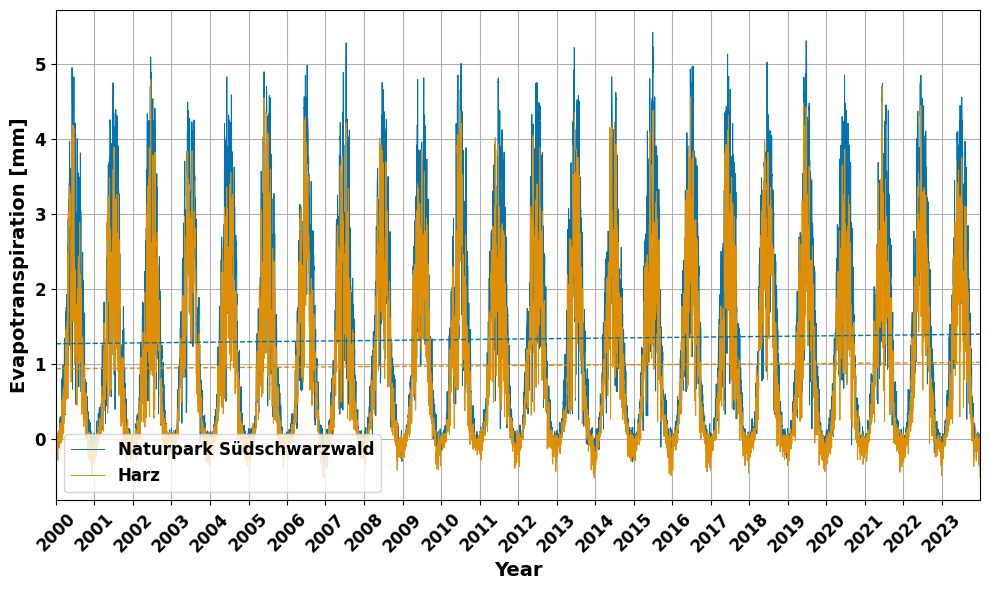

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import seaborn as sns
import numpy as np

# Read the NetCDF files into xarray.DataArray objects
evapotranspiration_xr_schwarzwald = xr.open_dataarray('data/evapotranspiration_data_schwarzwald.nc')
evapotranspiration_xr_harz = xr.open_dataarray('data/evapotranspiration_data_harz.nc')

# Calculate the mean along the lat and lon axes (axis=1) for evapotranspiration for both regions
mean_evapotranspiration_schwarzwald = evapotranspiration_xr_schwarzwald.mean(dim=('lat', 'lon'))
mean_evapotranspiration_harz = evapotranspiration_xr_harz.mean(dim=('lat', 'lon'))

# Set seaborn style with color-blind friendly palette
sns.set_palette("colorblind")

# Plot the mean evapotranspiration for Schwarzwald
plt.figure(figsize=(10, 6))
schwarzwald_color = sns.color_palette()[0]  # First color in the colorblind palette
harz_color = sns.color_palette()[1]  # Second color in the colorblind palette
plt.plot(mean_evapotranspiration_schwarzwald.time, mean_evapotranspiration_schwarzwald, linestyle='-', color=schwarzwald_color, label='Naturpark Südschwarzwald', linewidth=0.7)
# Plot the mean evapotranspiration for Harz
plt.plot(mean_evapotranspiration_harz.time, mean_evapotranspiration_harz, linestyle='-', color=harz_color, label='Harz', linewidth=0.7)

# Calculate trend lines
z_schwarzwald = np.polyfit(mdates.date2num(mean_evapotranspiration_schwarzwald.time), mean_evapotranspiration_schwarzwald, 1)
p_schwarzwald = np.poly1d(z_schwarzwald)
plt.plot(mean_evapotranspiration_schwarzwald.time, p_schwarzwald(mdates.date2num(mean_evapotranspiration_schwarzwald.time)), color=schwarzwald_color, linestyle='--', linewidth=1)
z_harz = np.polyfit(mdates.date2num(mean_evapotranspiration_harz.time), mean_evapotranspiration_harz, 1)
p_harz = np.poly1d(z_harz)
plt.plot(mean_evapotranspiration_harz.time, p_harz(mdates.date2num(mean_evapotranspiration_harz.time)), color=harz_color, linestyle='--', linewidth=1)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Evapotranspiration [mm]', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Set the x-axis limits to include only the years with data for Schwarzwald
plt.xlim(mean_evapotranspiration_schwarzwald.time.min(), mean_evapotranspiration_schwarzwald.time.max())

# Show every year on the x-axis based on the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.grid(True)
plt.tight_layout()

# Make the legend text bold and add a frame with a white background
legend = plt.legend(loc='lower left', fontsize=12, frameon=True, facecolor='white')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Save the plot as a PDF file in the results folder
plt.savefig('results/evapotranspiration_plot.pdf')

plt.show()
